First lets make the stencil

In [363]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from IPython.display import clear_output
import time

In [43]:
def dirichlet_stencil(N):
    stencil = 2 * np.diag(np.ones(N)) - np.diag(np.ones(N-1), k = 1) - np.diag(np.ones(N-1), k = -1)
    
    stencil[0] = 0
    stencil[-1] = 0
    stencil[0, 0] = 1
    stencil[-1, -1] = 1
    
    stencil /= (1 / (N - 1))**2
    
    return -stencil

In [327]:
def neumann_stencil_left(N):
    stencil = 2 * np.diag(np.ones(N)) - np.diag(np.ones(N-1), k = 1) - np.diag(np.ones(N-1), k = -1)
    
    
    stencil[-1] = 0 
    stencil[-1, -1] = 1
    
    
    h = 1 / (N - 1) 
    
    stencil[0, 1] = -1 
    stencil[0, 0] = 1
    
    stencil /= h**2
    
    
    return -stencil

In [468]:
def neumann_stencil_both(N):
    stencil = 2 * np.diag(np.ones(N)) - np.diag(np.ones(N-1), k = 1) - np.diag(np.ones(N-1), k = -1)
    
    h = 1 / (N - 1)
    
    stencil[-1, -2] = -1 
    stencil[-1, -1] = 1
    
    stencil[0, 1] = -1
    stencil[0, 0] = 1

    stencil /= h**2

    return -stencil

In [469]:
def parabolic_start(N):
    x = np.linspace(0, 1, N)
    y = 4 * (-x * x + x)
    
    return x, y

In [574]:
alpha1 = 5
alpha2 = 5
temp1 = 2
temp2 = 1

N = 200

end_time = 10
steps = 1000
t_step = end_time / steps

boundary_function = np.sin(np.linspace(0, 2 * np.pi, steps) * 20)

x, u0 = parabolic_start(N)
stencil = neumann_stencil_both(N)

In [587]:
def run_heat_left_boundary_function(alpha, N, end_t, t_steps, boundary_function, u0):
    
    t_step = end_t / (t_steps - 1)
    u = [u0]
    for i in range(t_steps):
        b = u[i].copy()
        b[0] = alpha * (boundary_function[i] - u[i][0])
        u1 = np.linalg.solve(np.eye(N) - t_step * stencil, b)
        u.append(u1)
    return np.array(u)

In [575]:
#vector to store the values
u = [u0]
#for each timestep
for i in range(steps):
    
    #solve the system for the next state
    b = u[i].copy()
    b[0] = boundary_function[i]
    #b[0] = alpha1 * (temp1 - u[i][0])# / (1 / (N - 1))
    #b[-1] = alpha2 * (temp2 - u[i][-1])# / (1 / (N - 1))
    #b[-1] = 0
    
    u1 = np.linalg.solve(np.eye(N) - t_step * stencil, b)
    #append to the result vecotr
    u.append(u1)

#convert to numpy array
u = np.array(u)

In [580]:
alpha = 5
N = 200

end_time = 10
steps = 1000

bf = np.sin(np.linspace(0, 2 * np.pi, steps) * 20)

x, u0 = parabolic_start(N)

In [582]:
u = run_heat_left_boundary_function(alpha, N, end_time, steps, bf, u0)

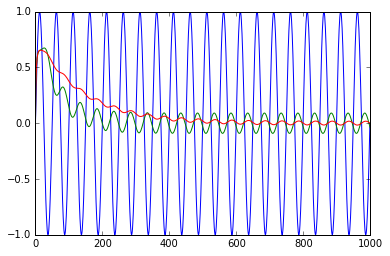

In [589]:
plt.plot(bf)
u = run_heat_left_boundary_function(10, N, end_time, steps, bf, u0)
plt.plot(u[:,-1])
u = run_heat_left_boundary_function(1, N, end_time, steps, bf, u0)
plt.plot(u[:,-1])

In [ ]:
alpha = np.arange

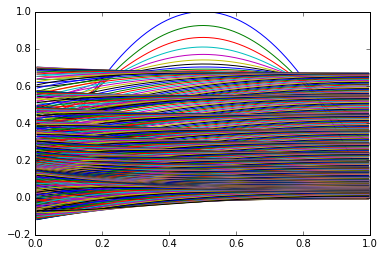

In [576]:
plt.figure()
for i in range(len(u) // 1):
    plt.plot(x[1:-1], u[i * 1, 1:-1])

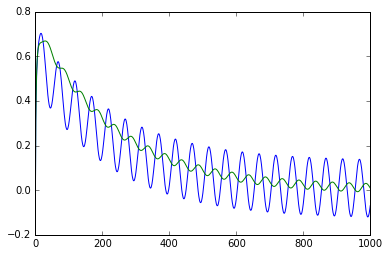

In [577]:
plt.plot(u[:,0])
plt.plot(u[:,-1])

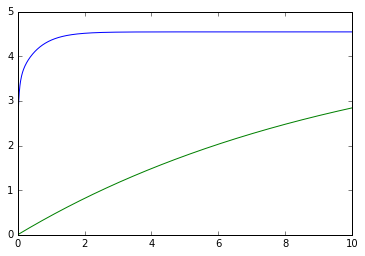

In [454]:
t = np.linspace(0, 10, u.shape[0])
plt.plot(t, u[:, 1])
plt.plot(t, 4.5 * (1 - np.exp(-t/alpha1)))

In [450]:
u.shape

(1001, 200)

In [451]:
t.shape

(10,)

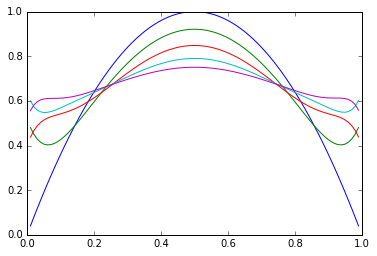

In [246]:
N = 100

steps = 1000000
t_step = 0.01

x, u0 = parabolic_start(N)
stencil = neumann_stencil_both(N)

#result vector
u_cn = [u0]
#the implicit side

first = np.linalg.inv(-0.5 * t_step * stencil + np.eye(N))
#the explicit side
second = np.eye(N) + 0.5 * t_step * stencil
m = first @ second
for i in range(steps):
    #the next step is just matrix multiplication
    b = u_cn[i]
    b[0] = 0
    u1 = m.dot(b)
    u_cn.append(u1)
    
u_cn = np.array(u_cn)

plot_idx = [0, 5, 100, 500, 1000, 2000, 5000, 9000, 50000]
plot_idx = np.arange(5)
for i in plot_idx:
    plt.plot(x[1:-1], u_cn[i, 1:-1])

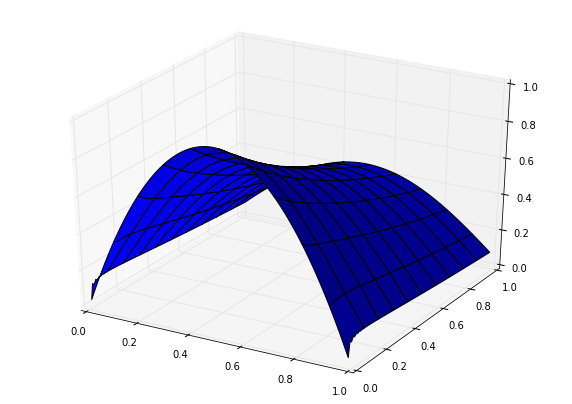

In [172]:
fig = plt.figure(1, (10, 7)) 
ax = fig.add_subplot(111, projection='3d') 

time_ax = np.linspace(0, 1, steps + 1)
X, Y = np.meshgrid(x[1:-1], time_ax) # Plot the surface 
ax.plot_surface(X, Y, u[:,1:-1], color='b') 
plt.show() 